<img style="float: right;" width="120" src="../Images/supplier-logo.png">
<img style="float: left; margin-top: 0" width="80" src="../Images/client-logo.png">
<br><br><br>


# Overview

Develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# Import the python packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data

In [2]:
df_cars = pd.read_excel(io='../Data/DL_DATA.xls', sheet_name = 'CARS')


In [3]:
df_cars.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,M,42,62812,11609,3490,35321
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,M,41,66647,9573,3703,45116
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,F,43,53799,11160,2989,42926
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,F,58,79370,14426,4409,67422
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,F,57,59729,5359,3318,55915
5,Carla Hester,mi@Aliquamerat.edu,Liberia,F,57,68500,14179,3806,56612
6,Griffin Rivera,vehicula@at.co.uk,Syria,F,47,39815,5958,2212,28926
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,F,50,51752,10986,2875,47435
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,M,47,58139,3441,3230,48014
9,Rhonda Chavez,nec@nuncest.com,Somalia,F,43,53457,12884,2970,38190


# Explore the data

In [5]:
# sns.pairplot(df_cars)

# Create Training and Test Data

>
>**X** - Matrix of independent variables (inputs)
>
>**y** - Dependent variable vector (outputs)
>

In [7]:
# Remove unwanted columns
X = df_cars.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [8]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,M,42,62812,11609,3490
1,M,41,66647,9573,3703
2,F,43,53799,11160,2989
3,F,58,79370,14426,4409
4,F,57,59729,5359,3318
...,...,...,...,...,...
495,M,41,71942,6996,3997
496,F,38,56039,12301,3113
497,F,54,68889,10612,3827
498,F,59,49812,14013,2767


## Encode the `Gender` column

>
>`M` ==> 0
>
>`F` ==> 1
>

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = make_column_transformer( (OneHotEncoder(categories='auto'),[0]),remainder="passthrough")
X['Gender'] = preprocessor.fit_transform(X)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0.0,42,62812,11609,3490
1,0.0,41,66647,9573,3703
2,1.0,43,53799,11160,2989
3,1.0,58,79370,14426,4409
4,1.0,57,59729,5359,3318
...,...,...,...,...,...
495,0.0,41,71942,6996,3997
496,1.0,38,56039,12301,3113
497,1.0,54,68889,10612,3827
498,1.0,59,49812,14013,2767


In [21]:
y = df_cars['Car Purchase Amount']
y

0      35321
1      45116
2      42926
3      67422
4      55915
       ...  
495    48901
496    31491
497    64147
498    45442
499    45107
Name: Car Purchase Amount, Length: 500, dtype: int64

## Feature Scaling

Use `MinMaxScaler` to scale/normalize model to values between 0 and 1

In [13]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X)
X_scaled = X_scaler.transform(X)

X_scaled

array([[0.        , 0.44      , 0.53515   , 0.57834171, 0.5352081 ],
       [0.        , 0.42      , 0.5830875 , 0.47603015, 0.58312711],
       [1.        , 0.46      , 0.4224875 , 0.55577889, 0.42249719],
       ...,
       [1.        , 0.68      , 0.6111125 , 0.52824121, 0.61102362],
       [1.        , 0.78      , 0.37265   , 0.69914573, 0.37255343],
       [1.        , 0.54      , 0.5171375 , 0.46688442, 0.51721035]])

In [14]:
X_scaler.data_max_

array([1.000e+00, 7.000e+01, 1.000e+05, 2.000e+04, 5.556e+03])

In [15]:
X_scaler.data_min_

array([    0.,    20., 20000.,   100.,  1111.])

In [16]:
y.shape

(500,)

In [22]:
y = y.values.reshape(-1,1)

y.shape

(500, 1)

In [23]:
type(y)

numpy.ndarray

In [24]:
y_scaler = MinMaxScaler().fit(y)
y_scaled = y_scaler.transform(y)
y_scaled

array([[0.37071831],
       [0.50867606],
       [0.47783099],
       [0.82284507],
       [0.66077465],
       [0.67059155],
       [0.28064789],
       [0.54133803],
       [0.54949296],
       [0.41112676],
       [0.70487324],
       [0.46885915],
       [0.27746479],
       [0.56702817],
       [0.57056338],
       [0.61995775],
       [0.4621831 ],
       [0.49157746],
       [0.50188732],
       [0.64546479],
       [0.59339437],
       [0.48453521],
       [0.53860563],
       [0.53007042],
       [0.50814085],
       [0.49842254],
       [0.39664789],
       [0.56467606],
       [0.69507042],
       [0.49287324],
       [0.12091549],
       [0.50211268],
       [0.80794366],
       [0.62660563],
       [0.43394366],
       [0.60016901],
       [0.42223944],
       [0.01538028],
       [0.37928169],
       [0.64539437],
       [0.51839437],
       [0.45869014],
       [0.26804225],
       [0.26501408],
       [0.84053521],
       [0.84401408],
       [0.35515493],
       [0.406

## Split Data into Test and Training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [26]:
X_scaled.shape

(500, 5)

In [27]:
X_train.shape

(375, 5)

In [28]:
X_test.shape

(125, 5)

# Train the model

Useing Keras to build the network 
- Sequentially (from left to right)
- Dense - all outputs are fully connected to next layer(hidden)

**Dense**
- input_dim - how many inputs (age, gender, etc)
- units - how many neurons in the first layer
- activation - rulu, sigmoid etc



In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# First Hidden Layer
layer1 = Dense(units = 7, input_dim=5, activation='relu')
model.add(layer1)

# Additional Hidden Layer - no need to specify input_dim here, Keras figures this out
layer2 = Dense(units=7, activation='relu')
model.add(layer2)

# THird Hidden Layer
layer3 = Dense(units = 7,  activation='relu')
model.add(layer3)

# Specify the output (units = 1)
model.add(Dense(units = 1, activation='linear'))


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')


## Train (fit) the model

Vary the `epochs` and `batch_size` parameters

In [32]:
epochs_hist = model.fit(X_train, y_train, epochs=40, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0764 - val_loss: 0.0412
Epoch 2/40
30/30 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.0255
Epoch 3/40
30/30 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0186
Epoch 4/40
30/30 [==============================] - 0s 10ms/step - loss: 0.0163 - val_loss: 0.0143
Epoch 5/40
30/30 [==============================] - 0s 9ms/step - loss: 0.0115 - val_loss: 0.0143
Epoch 6/40
30/30 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0127
Epoch 7/40
30/30 [==============================] - 0s 11ms/step - loss: 0.0093 - val_loss: 0.0110
Epoch 8/40
30/30 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0107
Epoch 9/40
30/30 [==============================] - 0s 11ms/step - loss: 0.0080 - val_loss: 0.0100
Epoch 10/40
30/30 [==============================] - 0s 9ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 11/40
30/

# Evaluate the Model

In [33]:
print(epochs_hist.history.keys())


dict_keys(['loss', 'val_loss'])


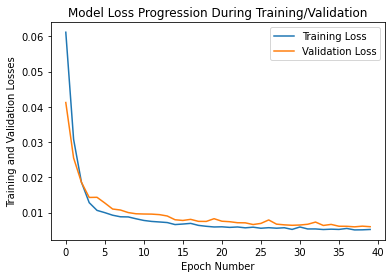

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss']);


## Make a prediction

In [39]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_Testing = np.array([[1, 50, 94500, 20000, 5000]])
X_Testing_scaled = X_scaler.transform(X_Testing)
X_Testing_scaled

array([[1.        , 0.6       , 0.93125   , 1.        , 0.87491564]])

In [40]:
y_predict_scaled = model.predict(X_Testing_scaled)
y_predict = y_scaler.inverse_transform(y_predict_scaled)

print('Expected Purchase Amount=', y_predict)

Expected Purchase Amount= [[64844.03]]


# Predict the test data

In [41]:
y_test_pred_scaled = model.predict(X_test)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test)

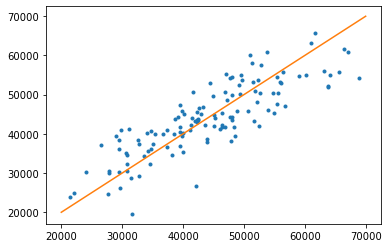

In [43]:
plt.plot(y_test_actual, y_test_pred, '.')
x = y = np.linspace(20000, 70000, 100)
plt.plot(x, y, '-');

In [ ]:
result_df = pd.DataFrame({'y_test_pred': pd.Series(y_test_pred.ravel()), 'y_test_actual': pd.Series(y_test_actual.ravel())})
result_df['error'] = result_df['y_test_pred'] - result_df['y_test_actual']
result_df

# Vary the hyper parameters

Vary the number of neurons and check the performance and the time taken to train the network